# 資料視覺化

> R 資料視覺化工具簡介

[數據交點](https://www.datainpoint.com) | 郭耀仁 <https://linktr.ee/yaojenkuo>

In [1]:
library("RCurl")
library("dplyr")
library("ggplot2")
library("plotly")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




## （複習）視覺化被用於探索與溝通兩個場景

![Imgur](https://i.imgur.com/din6Ig6.png)

來源：[R for Data Science](https://r4ds.had.co.nz/)

## （複習）載入、清理與轉換外型合稱為 "Wrangle"

![](https://i.imgur.com/iI7YT4x.png)

Source: [R for Data Science](https://r4ds.had.co.nz/)

## R 的資料視覺化工具

- "Wrangle"
    - [readxl](https://readxl.tidyverse.org/)、[odbc](https://db.rstudio.com/r-packages/odbc/)、[DBI](https://db.rstudio.com/r-packages/dbi/)
    - [dplyr](https://dplyr.tidyverse.org/)
    - [tidyr](https://tidyr.tidyverse.org/)
- 探索性分析與溝通分享：
    - 靜態：Base plotting system、[ggplot2](https://ggplot2.tidyverse.org/)
    - 地理資訊：[Leaflet](https://rstudio.github.io/leaflet/)
    - 動態：[Plotly](https://plotly.com/)
    - 網頁應用程式：[Shiny](https://shiny.rstudio.com/)

## 資料的載入、清理與轉換

## （複習）常見的來源資料格式

1. 純文字檔案。
2. 試算表。
3. 關聯式資料庫中的資料表。

## 使用 `read.csv()` 函數載入純文字檔案

- 先以 `RCurl::getURL()` 函數下載純文字檔案。
- 以 `head(df)` 檢視前五列。

In [2]:
data_url <- "https://raw.githubusercontent.com/datainpoint/classroom-data-visualization/main/data/daily_report.csv"
data <- getURL(data_url)
daily_report <- read.csv(text = data)
head(daily_report) # show the first 5 rows

,Combined_Key,Last_Update,Confirmed,Deaths
,<chr>,<chr>,<int>,<int>
1,Afghanistan,2022-04-21 04:20:46,178574,7680
2,Albania,2022-04-21 04:20:46,274606,3496
3,Algeria,2022-04-21 04:20:46,265746,6874
4,Andorra,2022-04-21 04:20:46,41013,153
5,Angola,2022-04-21 04:20:46,99287,1900
6,Antarctica,2022-04-21 04:20:46,11,0


In [3]:
data_url <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv"
data <- getURL(data_url)
lookup_table <- read.csv(text = data)
head(lookup_table) # show the first 5 rows

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
1,4,AF,AFG,4,NA,,,Afghanistan,33.93911,67.70995,Afghanistan,38928341
2,8,AL,ALB,8,NA,,,Albania,41.15330,20.16830,Albania,2877800
3,10,AQ,ATA,10,NA,,,Antarctica,-71.94990,23.34700,Antarctica,NA
4,12,DZ,DZA,12,NA,,,Algeria,28.03390,1.65960,Algeria,43851043
5,20,AD,AND,20,NA,,,Andorra,42.50630,1.52180,Andorra,77265
6,24,AO,AGO,24,NA,,,Angola,-11.20270,17.87390,Angola,32866268


In [4]:
data_url <- "https://raw.githubusercontent.com/datainpoint/classroom-data-visualization/main/data/time_series.csv"
data <- getURL(data_url)
time_series <- read.csv(text = data)
head(time_series) # show the first 5 rows

,Date,Country_Region,Confirmed,Deaths,Daily_Cases,Daily_Deaths
,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2020-01-22,Afghanistan,0,0,0,0
2,2020-01-22,Albania,0,0,0,0
3,2020-01-22,Algeria,0,0,0,0
4,2020-01-22,Andorra,0,0,0,0
5,2020-01-22,Angola,0,0,0,0
6,2020-01-22,Antarctica,0,0,0,0


## 其他資料格式所使用的套件與函數：試算表

`readxl::read_excel()` 函數

來源：<https://readxl.tidyverse.org/>

## 其他資料格式所使用的套件與函數：關聯式資料庫中的資料表

- 以 `odbc` 建立資料庫引擎。
- `DBI::dbConnect()` 建立連線。
- `DBI::dbSendQuery()` 讀取資料。

來源：<https://db.rstudio.com/>

## （複習）資料視覺化的前置作業

> When it comes to making graphs, half the battle occurs before you call any graphing commands.
>
> [Winston Chang](https://twitter.com/winston_chang?lang=en)

## 常見的資料清理、轉換技巧都能夠使用 dplyr/tidyr 的函數

- 選擇欄位。
- 篩選觀測值。
- 排序。
- 分組聚合。
- 轉置。
- 合併。
- 連結。

## 資料視覺化 123

1. 獲取資料。
2. 將資料整理為合適的格式與類型。
3. 輸入資料視覺化套件所定義好的函數。

## 試用 R 的資料視覺化工具

In [5]:
country_list <- c("US", "United Kingdom", "France", "Germany", "Canada", "Korea, South", "Japan", "Singapore", "Australia", "Taiwan", "New Zealand")
daily_report_merge_lookup_table <- inner_join(daily_report, lookup_table,
                                             by = "Combined_Key")
filtered_daily_report_merge_lookup_table <- subset(daily_report_merge_lookup_table, Country_Region %in% country_list)
data_for_bar <- filtered_daily_report_merge_lookup_table  %>% 
group_by(Country_Region) %>% 
summarise(Confirmed = sum(Confirmed)) %>% 
arrange(Confirmed)
data_for_bar

Country_Region,Confirmed
<chr>,<int>
New Zealand,865522
Singapore,1170970
Canada,3669173
Australia,5563493
Japan,7484263
"Korea, South",16674045
United Kingdom,22060704
Germany,23844536
France,28162002


In [6]:
data_for_line <- time_series %>% 
subset(Country_Region %in% country_list)
rownames(data_for_line) <- NULL
data_for_line[["Date"]] <- as.Date(data_for_line[["Date"]])
head(data_for_line)

,Date,Country_Region,Confirmed,Deaths,Daily_Cases,Daily_Deaths
,<date>,<chr>,<int>,<int>,<int>,<int>
1,2020-01-22,Australia,0,0,0,0
2,2020-01-22,Canada,0,0,0,0
3,2020-01-22,France,0,0,0,0
4,2020-01-22,Germany,0,0,0,0
5,2020-01-22,Japan,2,0,2,0
6,2020-01-22,"Korea, South",1,0,1,0


In [7]:
data_for_geo  <- daily_report_merge_lookup_table %>% 
group_by(iso3, Country_Region) %>% 
summarise(Confirmed = sum(Confirmed))
head(data_for_geo)

`summarise()` has grouped output by 'iso3'. You can override using the `.groups` argument.


iso3,Country_Region,Confirmed
<chr>,<chr>,<int>
,Diamond Princess,712
,MS Zaandam,9
,Summer Olympics 2020,865
,Winter Olympics 2022,535
ABW,Netherlands,34446
AFG,Afghanistan,178574


## Base plotting system

1. 將資料整理為合適的格式與類型。
2. 使用 Base plotting system 的作圖函數建立主要圖形。
3. 使用 Base plotting system 的作圖函數添加圖形元素。

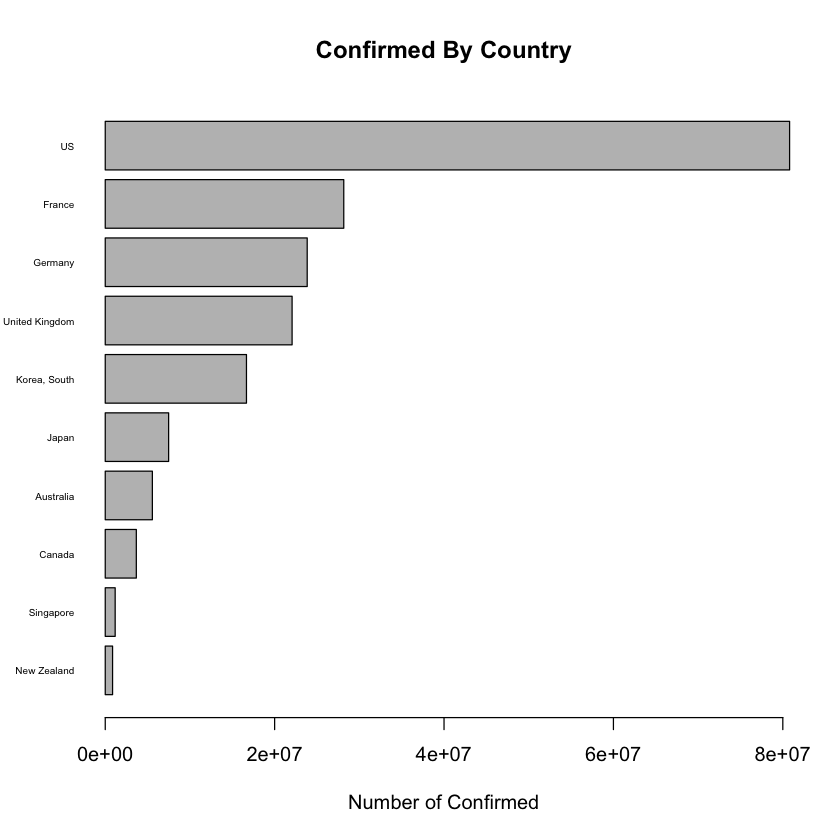

In [8]:
# Plotting with base plotting system
v <- data_for_bar[["Confirmed"]]
names(v) <- data_for_bar[["Country_Region"]]
barplot(v, horiz = TRUE, las = 1, cex.names=0.5)
title(main="Confirmed By Country", xlab="Number of Confirmed")

## [ggplot2](https://ggplot2.tidyverse.org/)

1. 將資料整理為合適的格式與類型。
2. 以 `library("ggplot")` 載入。
3. 使用 ggplot2 的 `ggplot()` 函數映射資料。
4. 以 `+` 連接 ggplot2 的作圖函數建立主要圖形。
5. 以 `+` 連接 ggplot2 的作圖函數添加圖形元素。

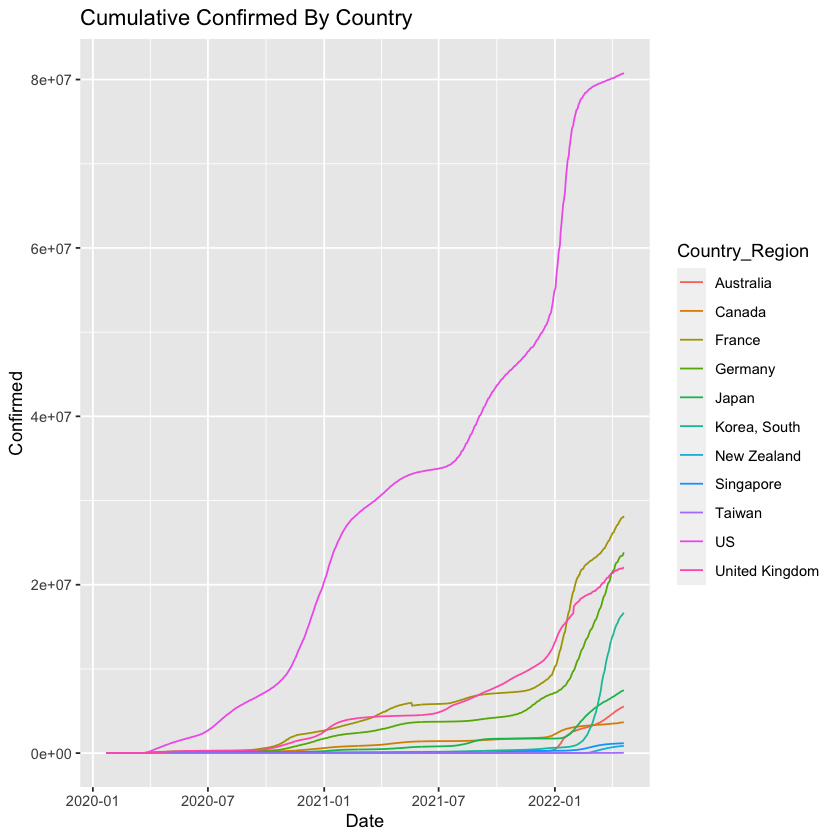

In [9]:
# Plotting with ggplot2
ggplot(data_for_line) +
geom_line(mapping = aes(x = Date, y = Confirmed, colour = Country_Region)) +
ggtitle("Cumulative Confirmed By Country")

## [Plotly](https://plotly.com/)

1. 將資料整理為合適的格式與類型。
2. 以 `library("plotly")` 載入。
3. 使用 Plotly 的作圖函數建立主要圖形。
4. 調整作圖函數的參數添加圖形元素。

```r
# Plotting with Plotly
y_factor <- factor(data_for_bar[["Country_Region"]], levels=data_for_bar[["Country_Region"]])
fig <- plot_ly(x = data_for_bar[["Confirmed"]],
               y = y_factor,
               type = 'bar', orientation = 'h')
fig
```

```r
# Plotting with Plotly
fig <- ggplot(data_for_line) +
geom_line(mapping = aes(x = Date, y = Confirmed, colour = Country_Region)) +
ggtitle("Cumulative Confirmed By Country")
ggplotly(fig)
```

```r
# Plotting with Plotly
fig <- plot_ly(data_for_geo, type='choropleth',
               locations=data_for_geo[["iso3"]], z=data_for_geo[["Confirmed"]],
               text=data_for_geo[["Country_Region"]])
fig
```